In [1]:
#Exo1 

import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import numpy as np
# Load data. quand lire un doc csv, separation par les différents formes --> , ; etc
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
dat = pd.read_csv(url, sep ='\t')

In [2]:
#Exo2

dat['MeanParents'] = 0.5 * (dat['Father'] + 1.08 * dat['Mother'])
print(dat)

    Family  Father  Mother Gender  Height  Kids  MeanParents
0        1    78.5    67.0      M    73.2     4        75.43
1        1    78.5    67.0      F    69.2     4        75.43
2        1    78.5    67.0      F    69.0     4        75.43
3        1    78.5    67.0      F    69.0     4        75.43
4        2    75.5    66.5      M    73.5     4        73.66
..     ...     ...     ...    ...     ...   ...          ...
893   136A    68.5    65.0      M    68.5     8        69.35
894   136A    68.5    65.0      M    67.7     8        69.35
895   136A    68.5    65.0      F    64.0     8        69.35
896   136A    68.5    65.0      F    63.5     8        69.35
897   136A    68.5    65.0      F    63.0     8        69.35

[898 rows x 7 columns]


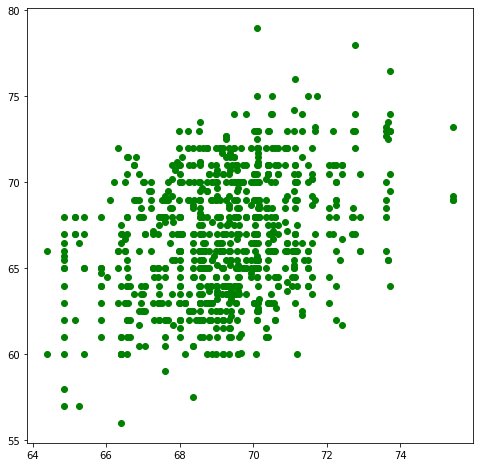

In [3]:
#Exo3   

#set x value and y value
y = dat['Height']
y = np.array(y).reshape(-1,1) # way 1: to reshape y, in this case x.shape = (898, 1); otherwishe x.shape = (898, )
x = dat[['MeanParents']] # way 2: add double [[]] for x to define size of xx

#draw image
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o', color='green', label="Data")


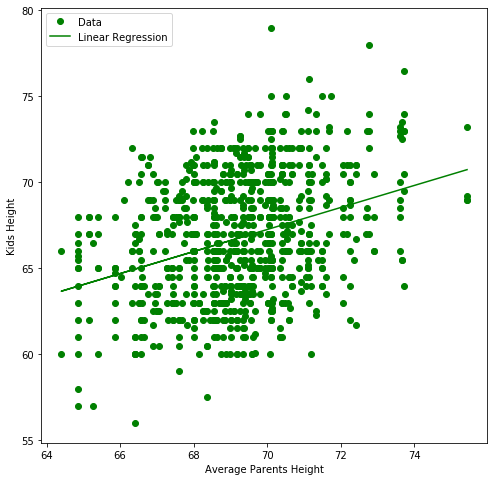

The coefficient is 0.64 , and the interception is 22.38 .


In [4]:
#Exo4

#train 1-variale-regression
regression = lm.LinearRegression(fit_intercept=True)
regression.fit(x, y)

#draw image
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o', color='green', label="Data")
plt.plot(x, regression.predict(x),label="Linear Regression", color = 'green') 
plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper left')
plt.show()

print('The coefficient is', round(regression.coef_[0,0], 2),', and the interception is', round(regression.intercept_[0], 2), '.')

yc = y - y.mean()
xc = x - x.mean()

regression = lm.LinearRegression(fit_intercept=True)
regression.fit(xc, yc) # Fit regression model
fig = plt.figure(figsize=(8, 8))
plt.plot(xc, yc, 'o', label="Data")
plt.plot(xc, regression.predict(xc),label="Linear Regression") 
plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper left')
plt.show()
print(regression.coef_, regression.intercept_)

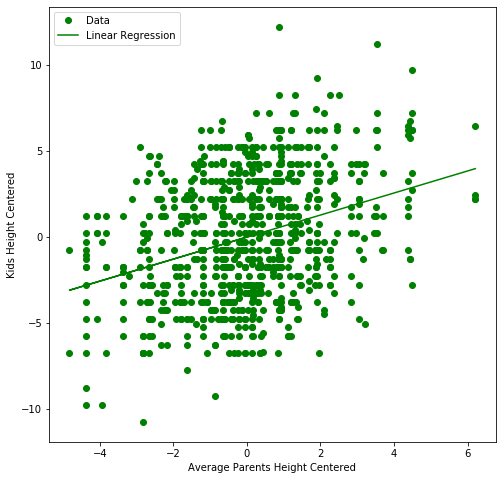

In centered model, the centered coefficient is 0.64 , which is the same to the original one. And the centered intercept is -0.0 , which is 22.0 after transformation, also the same to the original one.


In [5]:
#Exo 5

yc = y - y.mean() 
xc = x - x.mean()

regression_c = lm.LinearRegression(fit_intercept=True) 
regression_c.fit(xc, yc)
fig = plt.figure(figsize=(8, 8)) 
plt.plot(xc, yc, 'o', label="Data", color = 'green') 
plt.plot(xc, regression_c.predict(xc),label="Linear Regression", color = 'green') 
plt.xlabel("Average Parents Height Centered") 
plt.ylabel("Kids Height Centered") 
plt.legend(loc='upper left') 
plt.show() 

#transform centered intercept into original intercept
intercept_ori = y.mean() + regression_c.intercept_[0] - regression.coef_[0,0]*x.mean()
print('In centered model, the centered coefficient is', round(regression_c.coef_[0,0], 2), ', which is the same to the original one. And the centered intercept is', round(regression_c.intercept_[0],0), ', which is', round(intercept_ori[0],0), "after transformation, also the same to the original one." )

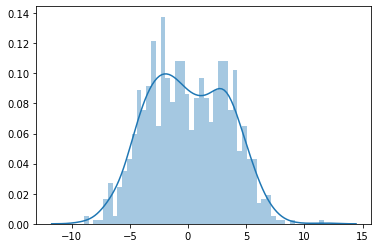

The forme approachs to a sum of 2 normal distributions.


In [6]:
# Exo 6

import seaborn as sns
residu = yc - regression_c.predict(xc)
sns.distplot(residu, bins = 50)
plt.show()
print('The forme approachs to a sum of 2 normal distributions.')

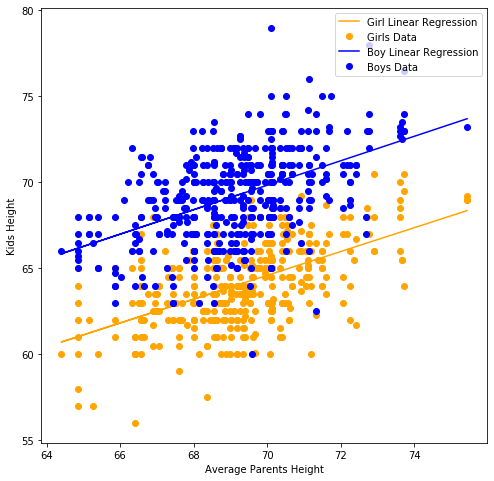

The 2 point clouds of boys and girls follow 2 different linear regressions. Given a random average parents height, the points are normal distributed on 2 Kids height values - boys and girl respectively, rather than assembling on 1 total linear regression value. That explains why there are 2 peaks in the residue distribution in Exo 6.


In [7]:
# Exo 7

#sort gril data and boy data
dat_girl = dat.loc[dat.Gender == 'F']
dat_boy = dat.loc[dat.Gender == 'M']

#set data for girls
y_girl = dat_girl[['Height']]
x_girl = dat_girl[['MeanParents']] # add double [[]] for x to define size of xx to (898,1), otherwise it's (898,)

#set data for boys
y_boy = dat_boy[['Height']]
x_boy = dat_boy[['MeanParents']]

fig = plt.figure(figsize=(8, 8))

#train girl linear regression
regression_girl = lm.LinearRegression(fit_intercept=True)
regression_girl.fit(x_girl, y_girl) # Fit regression model
plt.plot(x_girl, regression_girl.predict(x_girl),label="Girl Linear Regression", color = 'orange') 
plt.plot(x_girl, y_girl, 'o', label="Girls Data", color = 'orange')

#train boy linear regression
regression_boy = lm.LinearRegression(fit_intercept=True)
regression_boy.fit(x_boy, y_boy) # Fit regression model
plt.plot(x_boy, regression_boy.predict(x_boy),label="Boy Linear Regression", color = 'blue') 
plt.plot(x_boy, y_boy, 'o', label="Boys Data", color = 'blue')

plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper right')
plt.show()
print('The 2 point clouds of boys and girls follow 2 different linear regressions. Given a random average parents height, the points are normal distributed on 2 Kids height values - boys and girl respectively, rather than assembling on 1 total linear regression value. That explains why there are 2 peaks in the residue distribution in Exo 6.')




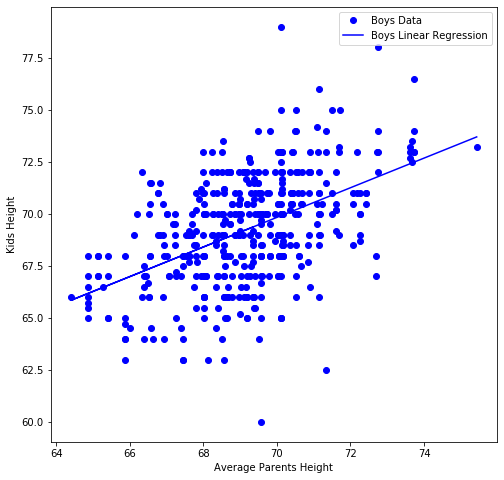

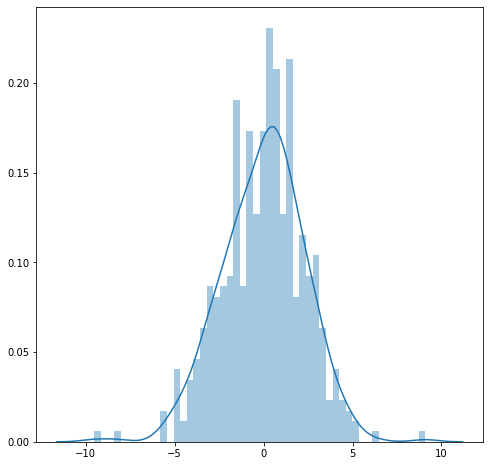

The boy residue histogram forme approachs to a normal distribution with mean = 0


In [8]:
# Exo 8

#boys linear regression
fig = plt.figure(figsize=(8, 8))
regression_boy = lm.LinearRegression(fit_intercept=True)
regression_boy.fit(x_boy, y_boy)
plt.plot(x_boy, y_boy, 'o', color='blue', label="Boys Data")
plt.plot(x_boy, regression_boy.predict(x_boy),label="Boys Linear Regression", color = 'blue')

plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper right')

#boys residue histogtram
fig = plt.figure(figsize=(8, 8))
residu_boy = y_boy - regression_boy.predict(x_boy)
sns.distplot(residu_boy, bins = 50)
plt.show()
print('The boy residue histogram forme approachs to a normal distribution with mean = 0')

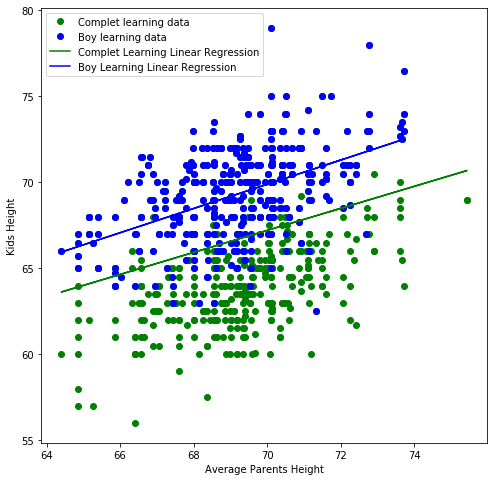

For boy test data, the prediction risk to use boy linear regression is 5.8 , the prediction risk to use complet linear regression is 11.19
Conclusion: the prediction risk is less when we use the same types of traning and test data. We should pay attention to use the same class of test data with training data.


In [9]:
# Exo 9

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#set learning and test dataframe
dat_learntotal, dat_testtotal = train_test_split(dat, test_size=0.2)
dat_learnboy = dat_learntotal.loc[dat.Gender == 'M']
dat_testboy = dat_testtotal.loc[dat.Gender == 'M']

#set learning data
y_lt = dat_learntotal[['Height']]
x_lt = dat_learntotal[['MeanParents']]
y_lb = dat_learnboy[['Height']]
x_lb = dat_learnboy[['MeanParents']]

#set test data
y_tt = dat_testtotal[['Height']]
x_tt = dat_testtotal[['MeanParents']]
y_tb = dat_testboy[['Height']]
x_tb = dat_testboy[['MeanParents']]

#train complet linear regression
regression_lt = lm.LinearRegression(fit_intercept=True)
regression_lt.fit(x_lt, y_lt)
#train boy linear regression
regression_lb = lm.LinearRegression(fit_intercept=True)
regression_lb.fit(x_lb, y_lb)

#plot
fig = plt.figure(figsize=(8, 8))
plt.plot(x_lt, y_lt, 'o', color='green', label="Complet learning data")
plt.plot(x_lb, y_lb, 'o', color='blue', label="Boy learning data")
plt.plot(x_lt, regression_lt.predict(x_lt),color='green', label="Complet Learning Linear Regression") 
plt.plot(x_lb, regression_lb.predict(x_lb),color='blue', label="Boy Learning Linear Regression")

plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper left')
plt.show()

#prediction risk
predrisk_tt = mean_squared_error(regression_lt.predict(x_tb), y_tb)
predrisk_tb = mean_squared_error(regression_lb.predict(x_tb), y_tb) 
#way 2: predrisk_sb = np.sum((dat_sampleboy[['Height']] - regression_sb.predict(x_sb))**2)/dat_sampleboy.index.size

print('For boy test data, the prediction risk to use boy linear regression is', round(predrisk_tb, 2), ', the prediction risk to use complet linear regression is', round(predrisk_tt, 2))

print('Conclusion: the prediction risk is less when we use the same types of traning and test data. We should pay attention to use the same class of test data with training data.')

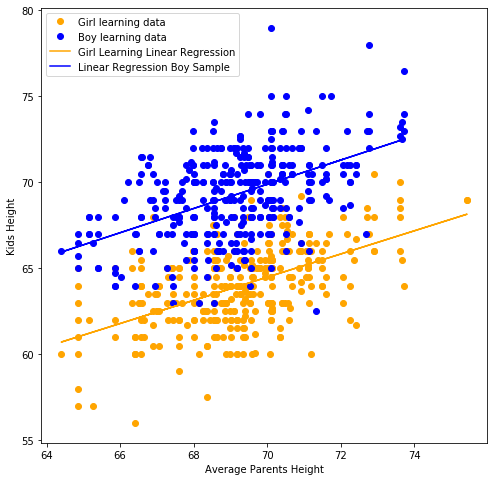

The prediction risk for each individu of boy is 5.29
The prediction risk for each individu of girl is 3.99
Conclusion: boys height has more variance than girls height. It is more difficult to predict boys height.


In [10]:
#Exo 10

#set learning and test dataframe
dat_learngirl = dat_learntotal.loc[dat.Gender == 'F']
dat_testgirl = dat_testtotal.loc[dat.Gender == 'F']

#set learning data
y_lg = dat_learngirl[['Height']]
x_lg = dat_learngirl[['MeanParents']]

#set test data
y_tg = dat_testgirl[['Height']]
x_tg = dat_testgirl[['MeanParents']]

#train girl linear regression
regression_lg = lm.LinearRegression(fit_intercept=True)
regression_lg.fit(x_lg, y_lg)

#plot
fig = plt.figure(figsize=(8, 8))
plt.plot(x_lg, y_lg, 'o', color='orange', label="Girl learning data")
plt.plot(x_lb, y_lb, 'o', color='blue', label="Boy learning data")
plt.plot(x_lg, regression_lg.predict(x_lg),color='orange', label="Girl Learning Linear Regression")
plt.plot(x_lb, regression_lb.predict(x_lb),color='blue', label="Linear Regression Boy Sample")
plt.xlabel("Average Parents Height")
plt.ylabel("Kids Height")
plt.legend(loc='upper left')
plt.show()

#prediction risk
predrisk_lg_idv = mean_squared_error(regression_lg.predict(x_girl), y_girl)
predrisk_lb_idv = mean_squared_error(regression_lb.predict(x_boy), y_boy) 
print("The prediction risk for each individu of boy is", round(predrisk_lb_idv,2))
print("The prediction risk for each individu of girl is", round(predrisk_lg_idv,2))

print('Conclusion: boys height has more variance than girls height. It is more difficult to predict boys height.')


In [11]:
#Exo 11


#Gender boolean
Gender = ['F', 'M']
gender_g = dat_testtotal['Gender'] == Gender[0]
gender_b = dat_testtotal['Gender'] == Gender[1]

#theoretical height with test sample
y_train = np.transpose(regression_lg.predict(x_tt))*gender_g.values+np.transpose(regression_lb.predict(x_tt))*gender_b.values

#R2 with gender
R2_Gender = np.sum(np.square(y_train - y_train.mean()))/np.sum(np.square(y_tt-y_tt.mean()))
print('Determination coefficient with Gender is', round(R2_Gender['Height'],2), '.')

#theoretical mean parents variance
theoretical_parents = np.sum((regression_lt.predict(x_tt)-np.mean(regression_lt.predict(x_tt)))**2)
R2_MeanParents = theoretical_parents/np.sum(np.square(y_tt-y_tt.mean()))

print('Determination coefficient with MeanParents is', round(R2_MeanParents['Height'],2), '.')

print('Conclusion: Gender model fits better than MeanParents model. Splitting data by class and training data seperately could potentially led to better models.')



Determination coefficient with Gender is 0.71 .
Determination coefficient with MeanParents is 0.12 .
Conclusion: Gender model fits better than MeanParents model. Splitting data by class and training data seperately could potentially led to better models.


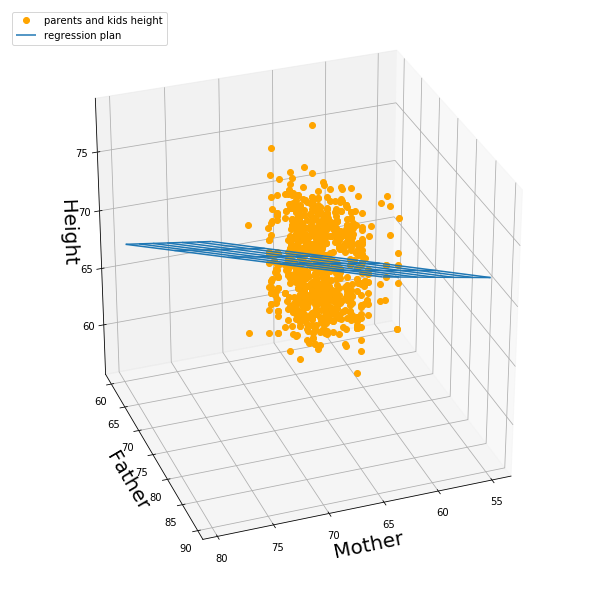

Conclusion: the general forme of residue distribution histogram for 3D model is quite similiar to the MeanParents model, with 2 peaks.


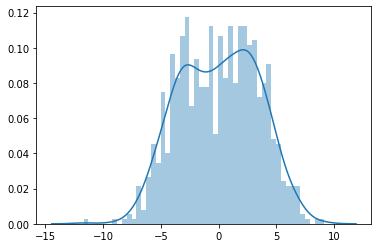

In [12]:
#Exo 12

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import statsmodels.api as sm

#set data
X = dat[['Mother', 'Father']]
X.insert(0, 'cons', 1)
Y = dat['Height']

#train 3D linear regression
results = sm.OLS(y, X).fit().params
XX = np.arange(55, 80, 0.5)
YY = np.arange(60, 90, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy

#plot
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.plot_wireframe(xx, yy, zz, label = 'regression plan',rstride=10, cstride=10)
ax.plot(X[['Mother']], X[['Father']],Y,'o', color='orange', label = 'parents and kids height')
ax.legend(loc='upper left')
ax.view_init(30,70)
ax.set_xlabel('Mother',fontsize=20)
ax.set_ylabel('Father',fontsize=20)
ax.set_zlabel('Height',fontsize=20)
plt.show()

#residue distribution histogram
Y_predict = results[0] + results[1]*X['Mother'] + results[2]*X['Father']
Y_predict= np.array(Y_predict).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
residu_parents=Y_predict - Y
sns.distplot(residu_parents, bins = 50)
print('Conclusion: the general forme of residue distribution histogram for 3D model is quite similiar to the MeanParents model, with 2 peaks.')

In [13]:
#Exo 13

#set data for 3D model
X_3Dlearn = dat_learntotal[['Mother', 'Father']]
Y_3Dlearn = dat_learntotal[['Height']]
X_3Dtest = dat_testtotal[['Mother', 'Father']]
Y_3Dtest = dat_testtotal[['Height']]

#train linear regression
regression_3Dlearn = lm.LinearRegression(fit_intercept=True)
regression_3Dlearn.fit(X_3Dlearn, Y_3Dlearn)

#theoretical variance
mean_3D_the = np.mean(regression_3Dlearn.predict(X_3Dtest))
theoretical_3D = np.sum((regression_3Dlearn.predict(X_3Dtest)-mean_3D_the)**2)

R2_3D = theoretical_3D/np.sum(np.square(y_tt-y_tt.mean()))

print('The determination coefficient for 3D model is', round(R2_3D['Height'], 4), '.')


#for MeanParents
mean_MP_the = np.mean(regression_lt.predict(x_tt))
theoretical_MP = np.sum((regression_lt.predict(x_tt)-mean_MP_the)**2)
R2_MP = theoretical_MP/np.sum(np.square(y_tt-y_tt.mean()))

print('The determination coefficient for MeanParents model is', round(R2_MP['Height'],4), '.')

print('Conclusion: the determination coefficient of MeanParents which contains only 1 variable is bigger than the determination coefficient of 3D model which contains 2 variables. So it is not always necessary to set more variable to get a better model.')

The determination coefficient for 3D model is 0.1226 .
The determination coefficient for MeanParents model is 0.1192 .
Conclusion: the determination coefficient of MeanParents which contains only 1 variable is bigger than the determination coefficient of 3D model which contains 2 variables. So it is not always necessary to set more variable to get a better model.
